In [1]:
# pip install plotpy

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("Virat_Kohli_data.csv")
print(data.head())

   Runs  BF  4s  6s     SR  Pos Dismissal  Inns   Opposition         Ground  \
0    12  22   1   0  54.54    2       lbw     1  v Sri Lanka       Dambulla   
1    37  67   6   0  55.22    2    caught     2  v Sri Lanka       Dambulla   
2    25  38   4   0  65.78    1   run out     1  v Sri Lanka  Colombo (RPS)   
3    54  66   7   0  81.81    1    bowled     1  v Sri Lanka  Colombo (RPS)   
4    31  46   3   1  67.39    1       lbw     2  v Sri Lanka  Colombo (RPS)   

  Start Date  
0  18-Aug-08  
1  20-Aug-08  
2  24-Aug-08  
3  27-Aug-08  
4  29-Aug-08  


In [3]:
print(data.isnull().sum())

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64


# Total Runs Between 18-Aug-08 - 22-Jan-17

In [53]:
data['Runs'].sum()

6184

# Average Runs Between 18-Aug-08 - 22-Jan-17

In [65]:
data['Runs'].mean().round(2)

46.85

# Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17

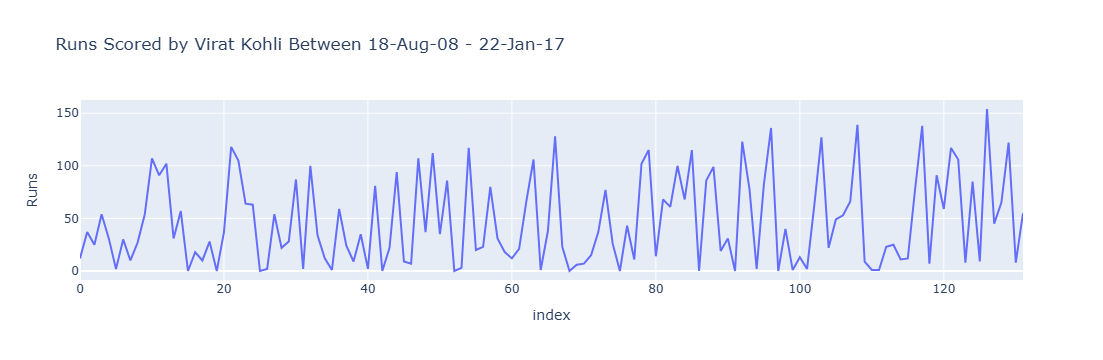

In [19]:
matches = data.index
figure = px.line(data, x=matches, y="Runs", 
                 title='Runs Scored by Virat Kohli Between 18-Aug-08 - 22-Jan-17')
figure.show()

# Number of matches at different Batting Positions

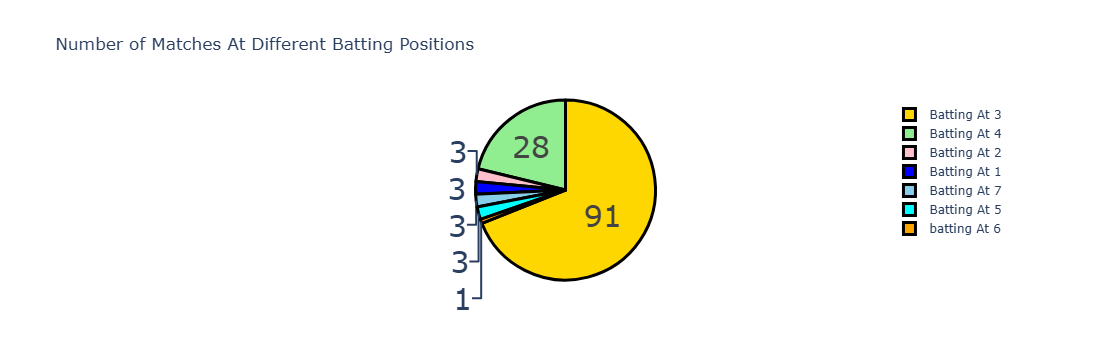

In [21]:
data["Pos"] = data["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2", 
                               1.0: "Batting At 1", 7.0:"Batting At 7", 5.0:"Batting At 5", 
                               6.0: "batting At 6"})

Pos = data["Pos"].value_counts()
label = Pos.index
counts = Pos.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"] #Specified colors

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Number of Matches At Different Batting Positions') #Title provided
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3))) #Added the feature that shows percentage when we hover over the chart
fig.show()

# Runs By Virat Kohli At Different Batting Positions

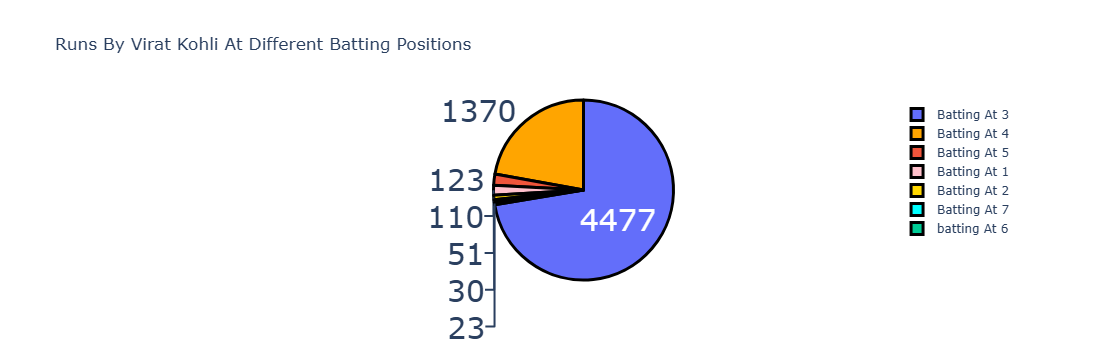

In [23]:
data = pd.read_csv("Virat_Kohli_data.csv")
data["Pos"] = data["Pos"].map({3.0: "Batting At 3", 4.0: "Batting At 4", 2.0: "Batting At 2", 
                               1.0: "Batting At 1", 7.0:"Batting At 7", 5.0:"Batting At 5", 
                               6.0: "batting At 6"})

label = data["Pos"]
counts = data["Runs"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Runs By Virat Kohli At Different Batting Positions')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

# Number of centuries scored by Virat Kohli while batting in the first innings and second innings

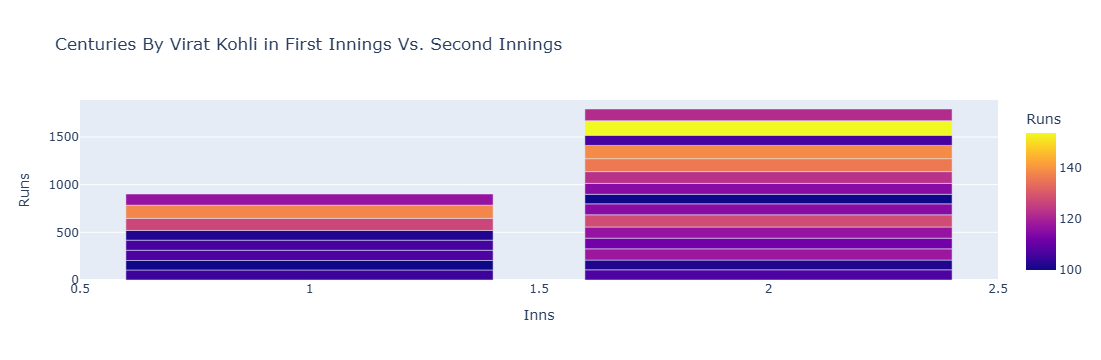

In [27]:
centuries = data.query("Runs >= 100")
figure = px.bar(centuries, x=centuries["Inns"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Centuries By Virat Kohli in First Innings Vs. Second Innings")
figure.show()

# So most of the centuries are scored while batting in the second innings. By this, we can say that Virat Kohli likes chasing scores. Now let’s have a look at the kind of dismissals Virat Kohli faced most of the time:

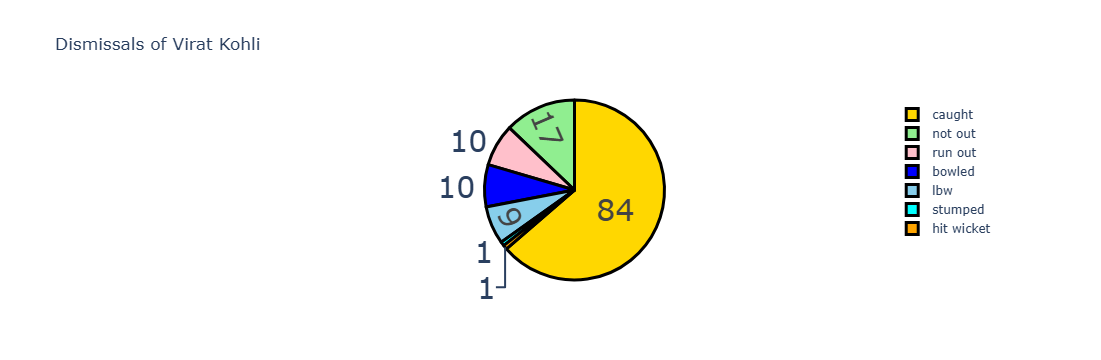

In [30]:
# Dismissals of Virat Kohli
dismissal = data["Dismissal"].value_counts()
label = dismissal.index
counts = dismissal.values
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Dismissals of Virat Kohli')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

# So most of the time, Virat Kohli gets out by getting caught by the fielder or the keeper. Now let’s have a look at against which team Virat Kohli scored most of his runs:

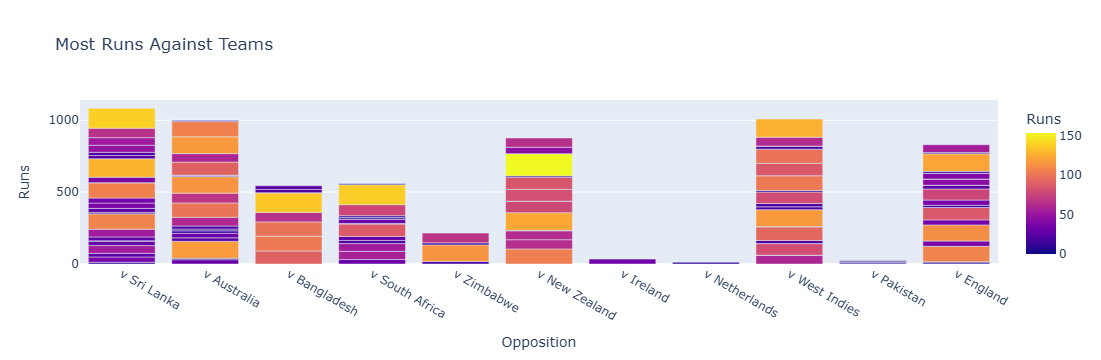

In [33]:
figure = px.bar(data, x=data["Opposition"], y = data["Runs"], color = data["Runs"],
            title="Most Runs Against Teams")
figure.show()

# According to the above figure, Virat Kohli likes batting against Sri Lanka, Australia, New Zealand, West Indies, and England. But he scored most of his runs while batting against Sri Lanka. Now let’s have a look at against which team Virat Kohli scored most of his centuries:

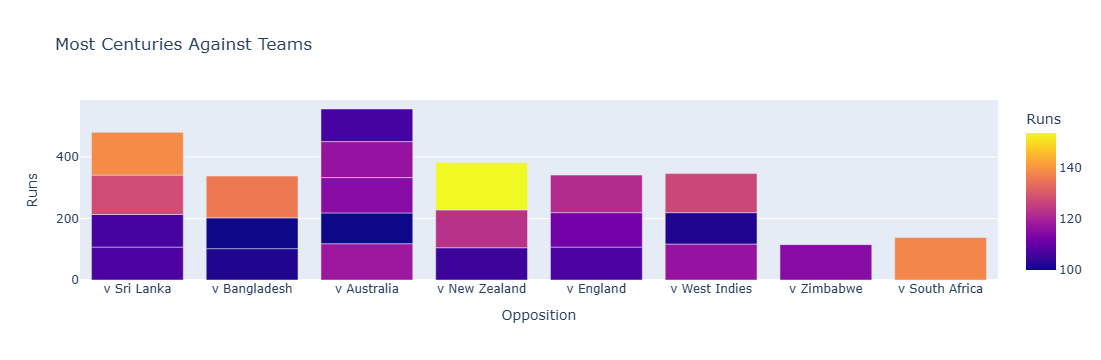

In [37]:
figure = px.bar(centuries, x=centuries["Opposition"], y = centuries["Runs"], 
                color = centuries["Runs"],
                title="Most Centuries Against Teams")
figure.show()

# So, most of the centuries scored by Virat Kohli were against Australia. Now let’s analyze Virat Kohli’s strike rate. To analyze Virat Kohli’s strike rate, I will create a new dataset of all the matches played by Virat Kohli where his strike rate was more than 120:

In [40]:
strike_rate = data.query("SR >= 120")
print(strike_rate)

     Runs  BF  4s  6s      SR           Pos Dismissal  Inns     Opposition  \
8      27  19   4   0  142.10  Batting At 7    bowled     1    v Sri Lanka   
32    100  83   8   2  120.48  Batting At 4   not out     1   v Bangladesh   
56     23  11   3   0  209.09  batting At 6   not out     1  v West Indies   
76     43  34   4   1  126.47  Batting At 3    caught     1      v England   
78    102  83  13   2  122.89  Batting At 3    caught     1  v West Indies   
83    100  52   8   7  192.30  Batting At 3   not out     2    v Australia   
85    115  66  18   1  174.24  Batting At 3   not out     2    v Australia   
93     78  65   7   2  120.00  Batting At 3    caught     2  v New Zealand   
130     8   5   2   0  160.00  Batting At 3    caught     1      v England   

            Ground Start Date  
8           Rajkot  15-Dec-09  
32           Dhaka  19-Feb-11  
56          Indore  08-Dec-11  
76      Birmingham  23-Jun-13  
78   Port of Spain  05-Jul-13  
83          Jaipur  16-Oct-

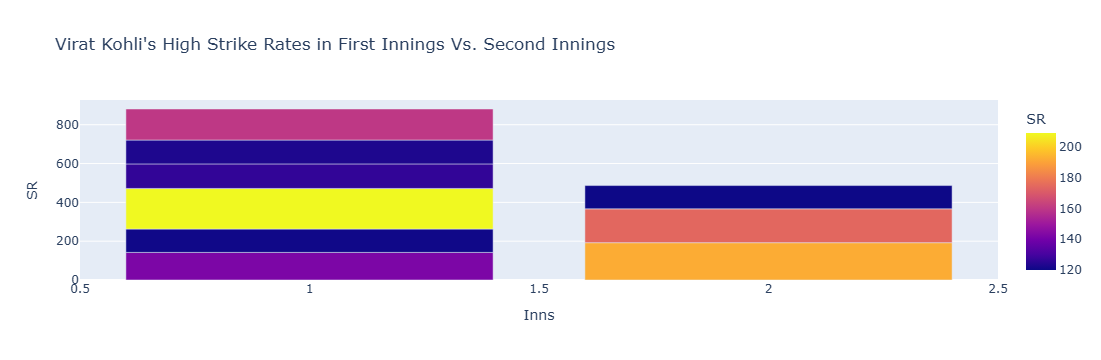

In [42]:
# Now let’s see whether Virat Kohli plays with high strike rates in the first innings or second innings:

figure = px.bar(strike_rate, x = strike_rate["Inns"], 
                y = strike_rate["SR"], 
                color = strike_rate["SR"],
            title="Virat Kohli's High Strike Rates in First Innings Vs. Second Innings")
figure.show()

# So according to the above figure, Virat Kohli likes playing more aggressively in the first innings compared to the second innings. Now let’s see the relationship between runs scored by Virat Kohli and fours played by him in each innings:

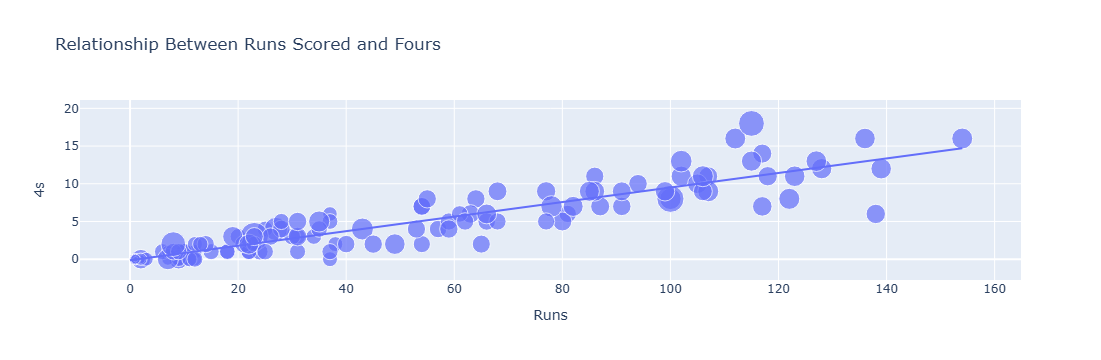

In [45]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="4s", size="SR", trendline="ols", 
                    title="Relationship Between Runs Scored and Fours")
figure.show()

# There is a linear relationship. It means that Virat Kohli likes playing fours. The more runs he scores in the innings, the more fours he plays. Let’s see if there is some relationship with the sixes:

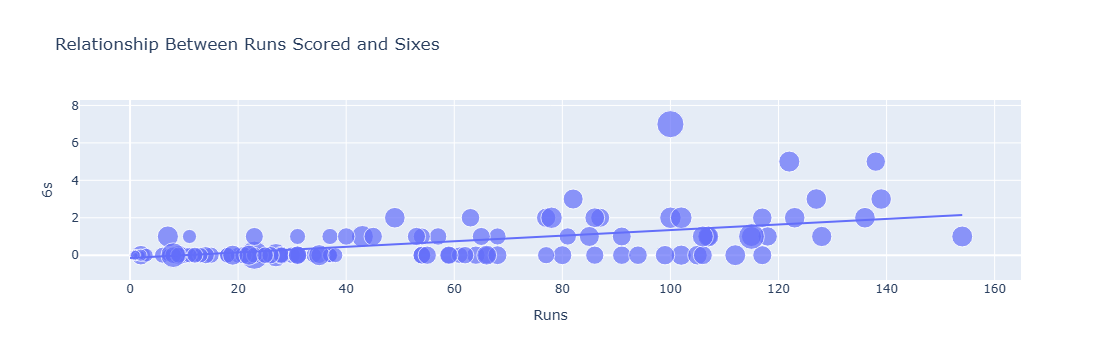

In [48]:
figure = px.scatter(data_frame = data, x="Runs",
                    y="6s", size="SR", trendline="ols", 
                    title= "Relationship Between Runs Scored and Sixes")
figure.show()

# There is no strong linear relationship here. It means Virat Kohli likes playing fours more than sixes. So this is how you can analyze the performance of Virat Kohli or any other cricketer in the world.

# Conclusions

> Total Runs : 6184

> Average runs : 46.85

> 68% of all the innings played by Virat Kohli, he batted in the third position.

> 72% of the total runs scored by Virat Kohli are while batting at 3rd position.

> Most of the centuries are scored while batting in the second innings.

> 63.6% times Virat Kohli gets out by getting caught by the fielder or the keeper.

> Most of the centuries scored by Virat Kohli were against Australia.